In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost
from rulefit import RuleFit
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from price_prediction_helper import cross_val_scores
from sklearn.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error,r2_score
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
from sklearn.svm import SVR

import warnings
import time
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
data = pd.read_csv('price_prediction_data_montreal_80_pca.csv',low_memory=False)
data.shape

(10916, 36)

In [3]:
X = np.array(data.drop(columns=['price']))
y = data.price

# Decision Trees

In [4]:
params={ 'max_depth':[1,5,6,7,8,9,10,15],
               "min_samples_split" : [2,3,4,5]}
clf=DecisionTreeRegressor(random_state=0)

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}

grid_search = GridSearchCV(clf, param_grid = params, scoring=scoring, refit='R2',cv=10, iid=False,n_jobs = -1)

start = time.time()
best_model = grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = grid_search.cv_results_
pd.DataFrame(results)

GridSearchCV took 28.78 seconds to find optimal parameters.
Optimal Parameters found :  {'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
R2 for optimal model :  0.31072062644350956


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.203458,0.065687,0.008988,0.007127,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.218090,0.320599,0.272464,0.284154,0.284072,0.270737,0.297019,0.279566,0.351404,0.192711,0.277082,0.043105,13,234.173401,228.457399,250.681077,247.834834,236.075597,255.387258,225.737205,246.267766,216.166085,243.841347,238.462197,11.818184,17
1,0.164971,0.039095,0.005349,0.006902,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.218090,0.320599,0.272464,0.284154,0.284072,0.270737,0.297019,0.279566,0.351404,0.192711,0.277082,0.043105,13,234.173401,228.457399,250.681077,247.834834,236.075597,255.387258,225.737205,246.267766,216.166085,243.841347,238.462197,11.818184,17
2,0.140124,0.020175,0.004273,0.002259,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.218090,0.320599,0.272464,0.284154,0.284072,0.270737,0.297019,0.279566,0.351404,0.192711,0.277082,0.043105,13,234.173401,228.457399,250.681077,247.834834,236.075597,255.387258,225.737205,246.267766,216.166085,243.841347,238.462197,11.818184,17
3,0.135198,0.028893,0.001892,0.004632,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.218090,0.320599,0.272464,0.284154,0.284072,0.270737,0.297019,0.279566,0.351404,0.192711,0.277082,0.043105,13,234.173401,228.457399,250.681077,247.834834,236.075597,255.387258,225.737205,246.267766,216.166085,243.841347,238.462197,11.818184,17
4,0.488218,0.103453,0.001297,0.001345,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.219935,0.361209,0.345863,0.308323,0.322523,0.302979,0.335093,0.339495,0.354004,0.217782,0.310721,0.049157,1,233.620765,214.801654,225.390700,239.467342,223.396431,244.096399,213.511089,225.781943,215.299802,236.268465,227.163459,10.304841,29
5,0.499648,0.132466,0.003890,0.003436,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.219935,0.361209,0.345863,0.308323,0.322523,0.302979,0.335093,0.339495,0.354004,0.217782,0.310721,0.049157,1,233.620765,214.801654,225.390700,239.467342,223.396431,244.096399,213.511089,225.781943,215.299802,236.268465,227.163459,10.304841,29
6,0.398276,0.048885,0.004239,0.003875,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.219935,0.361209,0.345863,0.308323,0.322523,0.302979,0.335093,0.339495,0.354004,0.217782,0.310721,0.049157,1,233.620765,214.801654,225.390700,239.467342,223.396431,244.096399,213.511089,225.781943,215.299802,236.268465,227.163459,10.304841,29
7,0.328016,0.040683,0.002274,0.003045,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.219935,0.361209,0.345863,0.308323,0.322523,0.302979,0.335093,0.339495,0.354004,0.217782,0.310721,0.049157,1,233.620765,214.801654,225.390700,239.467342,223.396431,244.096399,213.511089,225.781943,215.299802,236.268465,227.163459,10.304841,29
8,0.394355,0.059264,0.002321,0.003057,6,2,"{'max_depth': 6, 'min_samples_split': 2}",0.205864,0.349689,0.348291,0.312033,0.321694,0.307653,0.322869,0.329630,0.338042,0.156236,0.299200,0.061519,6,237.835099,218.675603,224.553987,238.182689,223.669981,242.459270,217.436317,229.154265,220.619523,254.858431,230.744516,11.578005,27
9,0.398244,0.063673,0.001421,0.003007,6,3,"{'max_depth': 6, 'min_samples_split': 3}",0.205887,0.349689,0.348291,0.313501,0.321640,0.306620,0.322869,0.329630,0.338743,0.156236,0.299311,0.061578,5,237.828002,218.675603,224.553987,237.674569,223.687609,242.821220,217.436317,229.154265,220.385792,254.858431,230.707580,11.602745,28


In [5]:
clf = DecisionTreeRegressor(min_samples_split=4,max_depth=5,random_state=0)
_,r2_scores,_,_=cross_val_scores('DT',clf,X, y)

DT RMSE : 14.98 (+/- 0.50)
DT R2 Score: 0.33 (+/- 0.04)


# Support Vector Regressor

In [6]:
params = {'C':[2,5,10], 'degree' : [1,2,3]}

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}


clf =SVR()

random_search = RandomizedSearchCV(clf, param_distributions = params, scoring=scoring, refit='R2',cv=10, iid=False,n_jobs = -1,n_iter=5)

start = time.time()
best_model = random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = random_search.cv_results_
pd.DataFrame(results)

RandomizedSearchCV took 352.29 seconds to find optimal parameters.
Optimal Parameters found :  {'C': 10, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
R2 for optimal model :  0.3660396585712893


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_C,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,44.847235,3.132622,7.355832,0.936051,2,2,"{'degree': 2, 'C': 2}",0.269229,0.396686,0.377182,0.372466,0.362124,0.350930,0.337372,0.349408,0.432733,0.291858,0.353999,0.045078,5,218.857763,202.872119,214.599349,217.26014,210.338380,227.303935,212.779196,222.393490,189.060568,213.893764,212.935870,10.155892,1
1,46.974804,5.103497,8.145459,1.790923,3,5,"{'degree': 3, 'C': 5}",0.267603,0.414967,0.396830,0.387837,0.368225,0.358234,0.345171,0.362893,0.455539,0.289193,0.364649,0.052834,3,219.344810,196.725063,207.829268,211.93851,208.326349,224.745932,210.275106,217.783851,181.459855,214.698753,209.312750,11.767846,2
2,47.488909,3.821192,7.563342,0.767480,2,5,"{'degree': 2, 'C': 5}",0.267603,0.414967,0.396830,0.387837,0.368225,0.358234,0.345171,0.362893,0.455539,0.289193,0.364649,0.052834,3,219.344810,196.725063,207.829268,211.93851,208.326349,224.745932,210.275106,217.783851,181.459855,214.698753,209.312750,11.767846,2
3,50.247343,3.173769,8.720933,1.730915,2,10,"{'degree': 2, 'C': 10}",0.259048,0.417299,0.408428,0.395174,0.364544,0.360125,0.347729,0.364213,0.462478,0.281361,0.366040,0.057937,1,221.906999,195.940848,203.833257,209.39840,209.540373,224.083892,209.453560,217.332516,179.147244,217.064631,208.770172,12.716664,4
4,36.640054,7.751921,4.288525,1.959367,3,10,"{'degree': 3, 'C': 10}",0.259048,0.417299,0.408428,0.395174,0.364544,0.360125,0.347729,0.364213,0.462478,0.281361,0.366040,0.057937,1,221.906999,195.940848,203.833257,209.39840,209.540373,224.083892,209.453560,217.332516,179.147244,217.064631,208.770172,12.716664,4


In [7]:
from sklearn.svm import SVR
clf = SVR(kernel = 'rbf', C=10, degree=1, gamma=0.1)
#clf.fit(X_train,y_train)
_,_,_,_=cross_val_scores('Support Vector Machines', clf, X, y)

Support Vector Machines RMSE : 14.19 (+/- 0.39)
Support Vector Machines R2 Score: 0.40 (+/- 0.03)


# K Nearest Neighbours

In [8]:
rmse_scores = []
for K in range(1,10):
    clf = KNeighborsRegressor(n_neighbors = K)
    _,_,rmse_val,_ = cross_val_scores('KNN-'+str(K),clf,X,y)
    rmse_scores.append(rmse_val)

KNN-1 RMSE : 20.77 (+/- 0.42)
KNN-1 R2 Score: -0.29 (+/- 0.04)
KNN-2 RMSE : 18.27 (+/- 0.31)
KNN-2 R2 Score: -0.00 (+/- 0.02)
KNN-3 RMSE : 17.36 (+/- 0.27)
KNN-3 R2 Score: 0.10 (+/- 0.02)
KNN-4 RMSE : 16.91 (+/- 0.25)
KNN-4 R2 Score: 0.14 (+/- 0.02)
KNN-5 RMSE : 16.57 (+/- 0.31)
KNN-5 R2 Score: 0.18 (+/- 0.02)
KNN-6 RMSE : 16.40 (+/- 0.32)
KNN-6 R2 Score: 0.19 (+/- 0.02)
KNN-7 RMSE : 16.25 (+/- 0.32)
KNN-7 R2 Score: 0.21 (+/- 0.02)
KNN-8 RMSE : 16.17 (+/- 0.29)
KNN-8 R2 Score: 0.22 (+/- 0.02)
KNN-9 RMSE : 16.12 (+/- 0.30)
KNN-9 R2 Score: 0.22 (+/- 0.02)


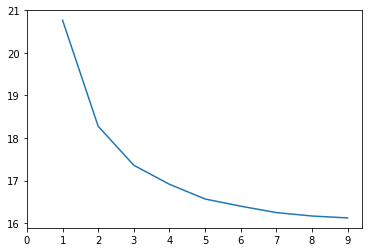

In [9]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_scores) #elbow curve 

plt.plot(np.arange(1,10),curve)
plt.xticks(np.arange(0,10))
plt.show()

In [10]:
K = 9
clf = KNeighborsRegressor(n_neighbors = K,n_jobs=-1)
_,r2_scores,_,_ = cross_val_scores('KNN-'+str(K),clf,X,y,cv=10)

KNN-9 RMSE : 16.12 (+/- 0.30)
KNN-9 R2 Score: 0.22 (+/- 0.02)


# Rule

In [11]:
params = {"tree_size": [2,4,6], 
              "max_rules" : [100,200]}

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}

rf = RuleFit(memory_par=0.01,
             tree_generator=None,
            rfmode='regress',random_state=1) 

grid_search = GridSearchCV(rf, param_grid = params, scoring=scoring, refit='R2',cv=10, iid=False,n_jobs = -1)

start = time.time()
best_model = grid_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = pd.DataFrame(grid_search.cv_results_)

RandomizedSearchCV took 131.97 seconds to find optimal parameters.
Optimal Parameters found :  {'Cs': None, 'cv': 3, 'exp_rand_tree_size': True, 'lin_standardise': True, 'lin_trim_quantile': 0.025, 'max_rules': 200, 'memory_par': 0.01, 'model_type': 'rl', 'random_state': 1, 'rfmode': 'regress', 'sample_fract': 'default', 'tree_generator__alpha': 0.9, 'tree_generator__criterion': 'friedman_mse', 'tree_generator__init': None, 'tree_generator__learning_rate': 0.01, 'tree_generator__loss': 'ls', 'tree_generator__max_depth': 100, 'tree_generator__max_features': None, 'tree_generator__max_leaf_nodes': 4, 'tree_generator__min_impurity_decrease': 0.0, 'tree_generator__min_impurity_split': None, 'tree_generator__min_samples_leaf': 1, 'tree_generator__min_samples_split': 2, 'tree_generator__min_weight_fraction_leaf': 0.0, 'tree_generator__n_estimators': 60, 'tree_generator__n_iter_no_change': None, 'tree_generator__presort': 'auto', 'tree_generator__random_state': 60, 'tree_generator__subsample'

In [12]:
scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}

rf = RuleFit(memory_par=0.01, tree_size=4, tree_generator=None, max_rules=100,rfmode='regress',random_state=1) 
result_cross_val = pd.DataFrame(cross_validate(rf.fit(X, y), X, y, cv=10, scoring=scoring))

In [13]:
mean_rmse = np.sqrt(np.array(result_cross_val['test_RMSE'])).mean()
std_rmse =  np.sqrt(np.array(result_cross_val['test_RMSE'])).std()
print("%s RMSE : %0.2f (+/- %0.2f)" % ('RuleFit', mean_rmse, std_rmse))

mean_r2 = np.array(result_cross_val['test_R2']).mean()
std_r2 =  np.array(result_cross_val['test_R2']).std()
print("%s R2 Score: %0.2f (+/- %0.2f)" % ('RuleFit', mean_r2, std_r2))

RuleFit RMSE : 14.38 (+/- 0.41)
RuleFit R2 Score: 0.37 (+/- 0.05)


In [14]:
rules = pd.DataFrame(rf.get_rules())
rules = rules[rules.coef != 0].sort_values(by="support")
num_rules_rule=len(rules[rules.type=='rule'])
num_rules_linear=len(rules[rules.type=='linear'])
rules.head()

,rule,type,coef,support,importance
50,feature_31 > 0.06310335360467434 & feature_16 ...,rule,0.204506,0.005510,0.015138
105,feature_16 > -0.009102161973714828 & feature_2...,rule,2.139610,0.015152,0.261365
55,feature_16 <= -0.01812302228063345 & feature_3...,rule,0.332955,0.022039,0.048881
47,feature_16 <= 0.043494511395692825 & feature_5...,rule,-2.065415,0.023416,0.312333
135,feature_16 > -0.03653703257441521 & feature_8 ...,rule,2.009849,0.042700,0.406350


# Random Forest

In [15]:
params = {"n_estimators": [100,300], 
              "max_depth" : [None,2,10],
              "min_samples_split" : [2,5,10]}

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}


clf =RandomForestRegressor(random_state=0, n_jobs = -1)

random_search = RandomizedSearchCV(clf, param_distributions = params, scoring=scoring, refit='R2',cv=10, iid=False,n_jobs = -1,n_iter=5)

start = time.time()
best_model = random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = random_search.cv_results_
pd.DataFrame(results)

RandomizedSearchCV took 438.64 seconds to find optimal parameters.
Optimal Parameters found :  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
R2 for optimal model :  0.38152431415719257


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,77.789608,2.148149,2.326581,2.027437,300,5,10,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.290413,0.425665,0.419432,0.414117,0.388783,0.391297,0.394093,0.380035,0.435168,0.276240,0.381524,0.051981,1,212.513489,193.127458,200.041500,202.839912,201.547455,213.167488,194.565298,211.924227,188.249177,218.611341,203.658734,9.539324,5
1,77.166804,2.025920,4.530310,3.275493,300,10,10,"{'n_estimators': 300, 'min_samples_split': 10,...",0.290641,0.425619,0.417732,0.413768,0.388364,0.391075,0.394901,0.380212,0.434316,0.276514,0.381314,0.051660,2,212.445045,193.143069,200.627540,202.960757,201.685791,213.245006,194.305859,211.863668,188.533096,218.528667,203.733850,9.475672,4
2,106.511946,5.186230,7.687943,1.299159,300,2,None,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.288411,0.403320,0.411084,0.417762,0.381022,0.396908,0.393231,0.367392,0.431506,0.283215,0.377385,0.048885,5,213.113128,200.641252,202.918150,201.578017,204.106796,211.202197,194.842226,216.245767,189.469677,216.504439,205.062165,8.621385,1
3,25.543653,4.880678,9.425044,3.572937,100,10,10,"{'n_estimators': 100, 'min_samples_split': 10,...",0.288175,0.425199,0.417428,0.411652,0.387145,0.392592,0.395821,0.379426,0.429909,0.267906,0.379525,0.053284,4,213.183726,193.284152,200.732123,203.693454,202.087633,212.713830,194.010650,212.132335,190.001915,221.128457,204.296828,9.715465,2
4,17.352216,3.457810,4.527773,2.433384,100,5,10,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.287987,0.425507,0.418232,0.411960,0.387668,0.392612,0.395241,0.379255,0.430261,0.266928,0.379565,0.053648,3,213.240028,193.180664,200.455076,203.586830,201.915310,212.706967,194.196751,212.190864,189.884626,221.423982,204.278110,9.800969,3


In [16]:
clf = RandomForestRegressor(max_depth=None,n_estimators=300,min_samples_split=5,n_jobs=-1)
_,r2_scores,_,_ = cross_val_scores('RF',clf,X,y)

RF RMSE : 13.96 (+/- 0.42)
RF R2 Score: 0.42 (+/- 0.03)


# Light GBM

In [17]:
#train_data=lgb.Dataset(X_train,label=y_train)
from sklearn.model_selection import GridSearchCV

clf = lgb.LGBMRegressor()

param_grid = {
    'learning_rate': [0.08, 0.04,0.02,0.01, 0.1, 1,2],
    'n_estimators': [100,200,300,500],
    'max_depth' : [None,3,4,5,6,7,8,9,10], 
}

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}

grid_search = RandomizedSearchCV(clf, param_distributions = param_grid, scoring=scoring, refit='R2',cv=10,n_iter=10, iid=False,n_jobs = -1)

start = time.time()
best_model = grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = grid_search.cv_results_
pd.DataFrame(results)

GridSearchCV took 223.99 seconds to find optimal parameters.
Optimal Parameters found :  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.02, 'max_depth': 8, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
R2 for optimal model :  0.3952456828319076


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,9.857841,0.938545,0.103105,0.032921,300,9,0.01,"{'n_estimators': 300, 'max_depth': 9, 'learnin...",0.288668,0.428440,0.418761,0.410989,0.387559,0.383922,0.391160,0.384391,0.435925,0.290610,0.382042,0.049440,5,213.036175,192.194579,200.272843,203.922917,201.951148,215.750184,195.507263,210.435137,187.996662,214.270776,203.533768,9.220316,6
1,7.262346,1.107602,0.076558,0.027454,200,10,0.01,"{'n_estimators': 200, 'max_depth': 10, 'learni...",0.284622,0.412311,0.391301,0.389452,0.374834,0.362345,0.375417,0.371609,0.411402,0.284755,0.365805,0.043394,7,214.247793,197.617869,209.734531,211.379402,206.147170,223.306342,200.562374,214.804439,196.169768,216.039366,209.000906,8.337601,4
2,5.244082,0.798453,0.062480,0.018483,200,None,0.1,"{'n_estimators': 200, 'max_depth': None, 'lear...",0.272439,0.431204,0.453371,0.417627,0.370276,0.382572,0.387557,0.368708,0.423840,0.287589,0.379518,0.056334,6,217.896575,191.265128,188.347678,201.624713,207.650037,216.222697,196.664084,215.795870,192.024370,215.183305,204.267446,11.087700,5
3,1.466842,0.311525,0.028118,0.015307,200,3,2,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",-0.056891,-0.037068,-0.031228,-0.027724,-0.027218,-0.040343,-0.009783,-0.022472,-0.054521,-0.037243,-0.034449,0.013475,10,316.527214,348.727433,355.322077,355.810792,338.722836,364.327461,324.255831,349.513858,351.454233,313.298658,341.796039,16.898637,1
4,8.243151,0.953824,0.085642,0.009882,300,10,0.04,"{'n_estimators': 300, 'max_depth': 10, 'learni...",0.286256,0.435856,0.451821,0.428335,0.391095,0.397317,0.396803,0.378158,0.448488,0.313166,0.392730,0.052581,3,213.758318,189.700569,188.881656,197.917617,200.784997,211.059069,193.695039,212.565748,183.809603,207.457885,199.963050,10.303536,8
5,12.292262,1.918742,0.146840,0.031403,500,None,0.04,"{'n_estimators': 500, 'max_depth': None, 'lear...",0.286363,0.434672,0.455326,0.425373,0.386692,0.400101,0.392710,0.368451,0.444957,0.301081,0.389572,0.054557,4,213.726447,190.098788,187.674077,198.943057,202.237161,210.084159,195.009504,215.884004,184.986472,211.108210,200.975188,10.782788,7
6,7.693975,1.135731,0.114168,0.019792,300,6,0.02,"{'n_estimators': 300, 'max_depth': 6, 'learnin...",0.293121,0.440317,0.444315,0.426697,0.397617,0.396443,0.395657,0.385321,0.450091,0.307982,0.393756,0.051541,2,211.702532,188.200671,191.468042,198.484704,198.634441,211.365042,194.063205,210.117206,183.275437,209.023619,199.633490,9.897927,9
7,2.099955,0.419086,0.060223,0.014973,300,3,0.01,"{'n_estimators': 300, 'max_depth': 3, 'learnin...",0.270349,0.395480,0.359776,0.359229,0.347338,0.339513,0.357821,0.358404,0.399627,0.264235,0.345177,0.042928,8,218.522497,203.277774,220.596681,221.842759,215.213904,231.301990,206.212856,219.318383,200.094395,222.237441,215.861868,9.256118,3
8,3.513936,0.636508,0.035922,0.012202,100,None,0.01,"{'n_estimators': 100, 'max_depth': None, 'lear...",0.248147,0.344920,0.315869,0.324057,0.319669,0.296113,0.318822,0.316968,0.338258,0.251679,0.307450,0.031345,9,225.171770,220.279161,235.725650,234.019830,224.337622,246.500696,218.735875,233.482279,220.547608,226.029869,228.483036,8.319788,2
9,12.159956,1.301260,0.151529,0.014062,500,8,0.02,"{'n_estimators': 500, 'max_depth': 8, 'learnin...",0.293520,0.440482,0.452298,0.428416,0.398108,0.396949,0.400298,0.379122,0.453676,0.309588,0.395246,0.052723,1,211.582846,188.145295,188.717263,197.889493,198.472599,211.188144,192.572934,212.236228,182.080529,208.538554,199.142388,10.608978,10


In [21]:
#Normalization
X = MinMaxScaler().fit_transform(data.drop(columns=['price']))
y = data.price
clf = lgb.LGBMRegressor(learning_rate=0.02,max_depth=8,n_estimators=500)
_,r2_scores,_,_ = cross_val_scores('LGBM',clf,X,y)

LGBM RMSE : 13.85 (+/- 0.41)
LGBM R2 Score: 0.43 (+/- 0.03)


# XGBoost

In [19]:
#train_data=lgb.Dataset(X_train,label=y_train)
from sklearn.model_selection import GridSearchCV

clf = XGBRegressor()

param_grid = {
    'learning_rate': [0.08, 0.04,0.02,0.01, 0.1, 1,2],
    'n_estimators': [100,200,300,500],
    'max_depth' : [None,3,4,5,6,7,8,9,10], 
}

scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(mean_squared_error)}

grid_search = RandomizedSearchCV(clf, param_distributions = param_grid, scoring=scoring, refit='R2',cv=10,n_iter=10, iid=False,n_jobs = -1)

start = time.time()
best_model = grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = grid_search.cv_results_
pd.DataFrame(results)

[07:36:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
GridSearchCV took 597.71 seconds to find optimal parameters.
Optimal Parameters found :  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.02, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 1, 'missing': None, 'n_estimators': 300, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
R2 for optimal model :  0.3878550354527257


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,71.549472,6.846475,0.345230,0.068605,300,8,0.02,"{'n_estimators': 300, 'max_depth': 8, 'learnin...",0.282364,0.425115,0.437864,0.427324,0.397081,0.401878,0.398649,0.370443,0.445180,0.292652,0.387855,0.054430,1,214.924060,193.312553,193.690775,198.267673,198.811158,209.461834,193.102500,215.202887,184.912117,213.653953,201.533951,10.346228,10
1,26.782766,3.069226,0.268689,0.035485,200,4,0.02,"{'n_estimators': 200, 'max_depth': 4, 'learnin...",0.262407,0.419217,0.404979,0.396514,0.377024,0.386889,0.373624,0.375436,0.424185,0.271389,0.369166,0.053810,4,220.900882,195.295738,205.021642,208.934390,205.425108,214.711051,201.138132,213.496162,191.909628,220.076521,207.690925,9.329112,7
2,12.351784,0.630959,0.240567,0.028976,100,3,0.02,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",-0.032265,0.258063,0.293642,0.250768,0.237682,0.324441,0.154553,0.218103,0.204620,-0.023943,0.188566,0.116973,6,309.151965,249.485823,243.384006,259.393491,251.372889,236.580416,271.485276,267.277710,265.087034,309.281550,266.250016,23.821472,5
3,52.604829,2.326468,0.318679,0.045387,200,7,0.02,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.272820,0.431416,0.435427,0.420177,0.398961,0.413452,0.378146,0.381463,0.441702,0.271981,0.384554,0.059640,2,217.782265,191.193887,194.530325,200.742119,198.191268,205.408548,199.686195,211.435976,186.071566,219.897729,202.493988,10.561012,9
4,65.870458,4.685921,0.403035,0.039395,200,9,0.02,"{'n_estimators': 200, 'max_depth': 9, 'learnin...",0.252269,0.414941,0.438130,0.424108,0.396480,0.407795,0.383409,0.371893,0.432445,0.253001,0.377447,0.065419,3,223.937035,196.733601,193.598929,199.381008,199.009392,207.389781,197.996071,214.707129,189.156479,225.630787,204.754021,12.039208,8
5,25.506512,2.119578,0.259313,0.034368,100,7,1,"{'n_estimators': 100, 'max_depth': 7, 'learnin...",-0.284551,-0.030083,-0.005805,-0.015765,0.022813,-0.065799,-0.098451,-0.096129,-0.077458,-0.315568,-0.096680,0.108652,7,384.708831,346.378683,346.562032,351.670420,322.225400,373.242137,352.728168,374.692264,359.098703,397.366657,360.867329,20.752352,4
6,30.286632,2.349264,0.273368,0.030650,100,8,0.02,"{'n_estimators': 100, 'max_depth': 8, 'learnin...",-0.010825,0.276332,0.336709,0.294253,0.276354,0.371413,0.185955,0.242216,0.253059,0.003762,0.222923,0.122926,5,302.731002,243.342565,228.544811,244.338353,238.620626,220.130685,261.401434,259.035002,248.943099,300.913281,254.800086,26.293384,6
7,56.183480,2.432578,0.299925,0.056242,500,3,2,"{'n_estimators': 500, 'max_depth': 3, 'learnin...",-2.631415,-1.736529,-7.769103,-5.668507,-2.320505,-1.526059,-2.574538,-2.492493,-2.785486,-118.402189,-14.790682,34.586384,10,1087.568680,920.193292,3021.499141,2308.720446,1094.929584,884.623962,1147.835298,1193.846895,1261.639176,36065.366454,4898.622293,10409.374728,1
8,33.484200,1.670057,0.284308,0.034791,100,9,2,"{'n_estimators': 100, 'max_depth': 9, 'learnin...",-7.562055,-7.433392,-5.622308,-7.202646,-5.974660,-5.218249,-7.277121,-6.992668,-6.843064,-9.308037,-6.943420,1.098421,9,2564.241055,2835.837310,2281.795282,2839.858389,2299.879330,2177.626043,2657.901705,2732.152303,2613.962203,3113.537070,2611.679069,277.042326,2
9,55.756437,11.543053,0.198388,0.120800,200,8,1,"{'n_estimators': 200, 'max_depth': 8, 'learnin...",-0.323288,-0.040869,0.024776,0.009329,-0.134436,-0.044501,-0.105309,-0.037473,-0.163610,-0.229262,-0.104464,0.104707,8,396.310187,350.005765,336.025204,342.982535,374.077707,365.783471,354.930668,354.641942,387.81184

In [20]:
model = XGBRegressor(learning_rate=0.02,max_depth=8,n_estimators=300)
cross_val_scores('XGBoost', model, X, y)

[07:37:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:33] WARNI

([13.96058973697491,
  12.924987655796802,
  13.760179617232428,
  14.081673129204956,
  13.451123634354207,
  14.645572261898629,
  13.952757526460688,
  14.426048899015614,
  14.262813784888262,
  13.826277021238303],
 [0.4086197803109033,
  0.4827051930984386,
  0.44190578170737005,
  0.4026546884171932,
  0.4435662394487645,
  0.37545628212064897,
  0.4255802055583673,
  0.3943006406738691,
  0.39572464224542603,
  0.4170174520070761],
 13.929202326706479,
 0.4187530905588058)